<a href="https://colab.research.google.com/github/AnilOsmanTur/Spatio-Temporal-Event-Prediction/blob/main/Prediction_with_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction with HMM

In [57]:
!pip install hmmlearn
import numpy as np
from hmmlearn import hmm
np.random.seed(42) # to make the code reproducable 
print('imports done')

imports done


## Data Loading and Splitting

In [58]:
data = np.load('data.npy')
n_sample = data.shape[0]
flat_data = data.reshape(n_sample, -1)
print('data shape after flattening', flat_data.shape)
n_train = int(0.8 * n_sample )
n_test = n_sample - n_train
train_data = flat_data[:n_train]
test_data = flat_data[n_train:]
print('Training data split', train_data.shape)
print('Testing data split', test_data.shape)

data shape after flattening (4500, 9)
Training data split (3600, 9)
Testing data split (900, 9)


## Model Training

In [59]:
# model creation and training
model = hmm.GaussianHMM(n_components=32,
                        covariance_type="full",
                        n_iter=100,
                        verbose=True)
model.fit(train_data)

         1       -9825.9681             +nan
         2       50783.7443      +60609.7125
         3      191823.7693     +141040.0250
         4      198193.6123       +6369.8430
         5      198193.6130          +0.0007


GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=32, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=True)

## Prediction with model

In [60]:
# Prediction function to predict next data point
def predict_next(model, known_data):
  state_sequence = model.predict(known_data)
  prob_next_step = model.transmat_[state_sequence[-1], :]
  t1 = model._generate_sample_from_state(np.argmax(prob_next_step))
  t1 = 1/(1 + np.exp(-t1)) # sigmoid to get probablity score like resutls
  return t1

In [61]:
# Distance functions to measure distance between target and prediction
def hamming_dist(a, b):
  return np.count_nonzero(a!=b)
def euclidian_dist(a, b):
  return np.linalg.norm(a-b)

In [76]:
t1 = (predict_next(model, train_data[:5]) > 0.5).astype(np.float)
t1

array([0., 0., 0., 1., 0., 0., 1., 1., 0.])

In [77]:
label = train_data[5]
label

array([0., 0., 0., 1., 0., 0., 1., 1., 0.])

In [78]:
euclidian_dist(t1, label)

0.0

In [79]:
hamming_dist(t1, label)

0

## Test Case Generations

In [83]:
test_idx = np.random.randint(5, n_test, size=100)
start_idx = test_idx-5

In [85]:

test_cases = [test_data[start:end] for start, end in zip(start_idx,test_idx)]
test_labels = test_data[test_idx]
print(len(test_cases))
print(test_labels.shape)

100
(100, 9)


In [86]:
dists = []
for label, a_case in zip(test_labels, test_cases):
  t1 = (predict_next(model, a_case) > 0.5).astype(np.float)
  e_dist = euclidian_dist(t1, label)
  h_dist = hamming_dist(t1, label)
  dists.append([e_dist, h_dist])

print('prediction done')

prediction done


In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
dists = np.array(dists)
print('Average distances:')
d_means = np.mean(dists, axis=0)
print('Euclidian:', d_means[0])
print('Hamming  :', d_means[1])

Average distances:
Euclidian: 1.4873705325979736
Hamming  : 3.2


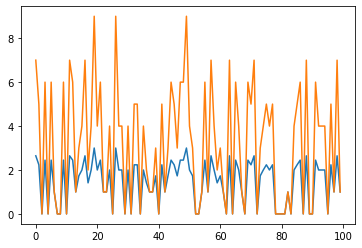

In [93]:
plt.plot(dists)